# Breast Cancer Classification - Gaussian NB

This is a Machine Learning project, which uses the Gaussian Naive Bayes Algorithm to Classify the tumor is Malignant or begnine

THe data which I used to build this model is from kaggle 

### Importing the Necessary packages

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Data

In [2]:
df = pd.read_csv("./data/tumor.csv")

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Exploratory Data Analysis

### Remove ID column for EDA

In [4]:
df_eda = df.drop(columns=['Sample code number'])

In [5]:
df_eda.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Handeling missing data

In [13]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

since we do not have any missing values, this step is ruled out

### 1. Class Dristibution (Count Plot)

/tmp/ipykernel_5961/3294030540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_eda, palette='viridis')


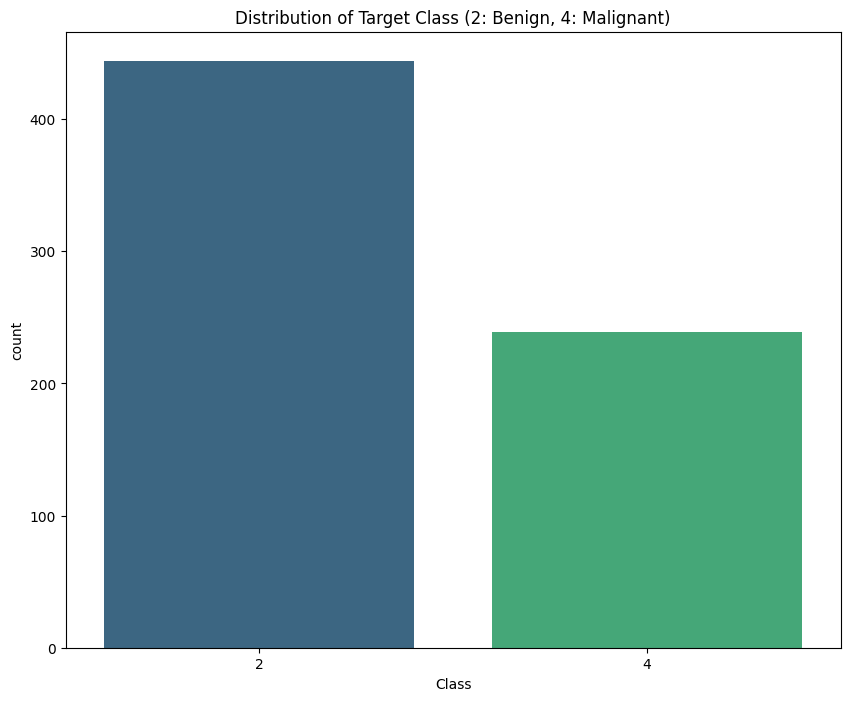

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=df_eda, palette='viridis')
plt.title('Distribution of Target Class (2: Benign, 4: Malignant)')
plt.show()

### 2. Correlation Heatmap

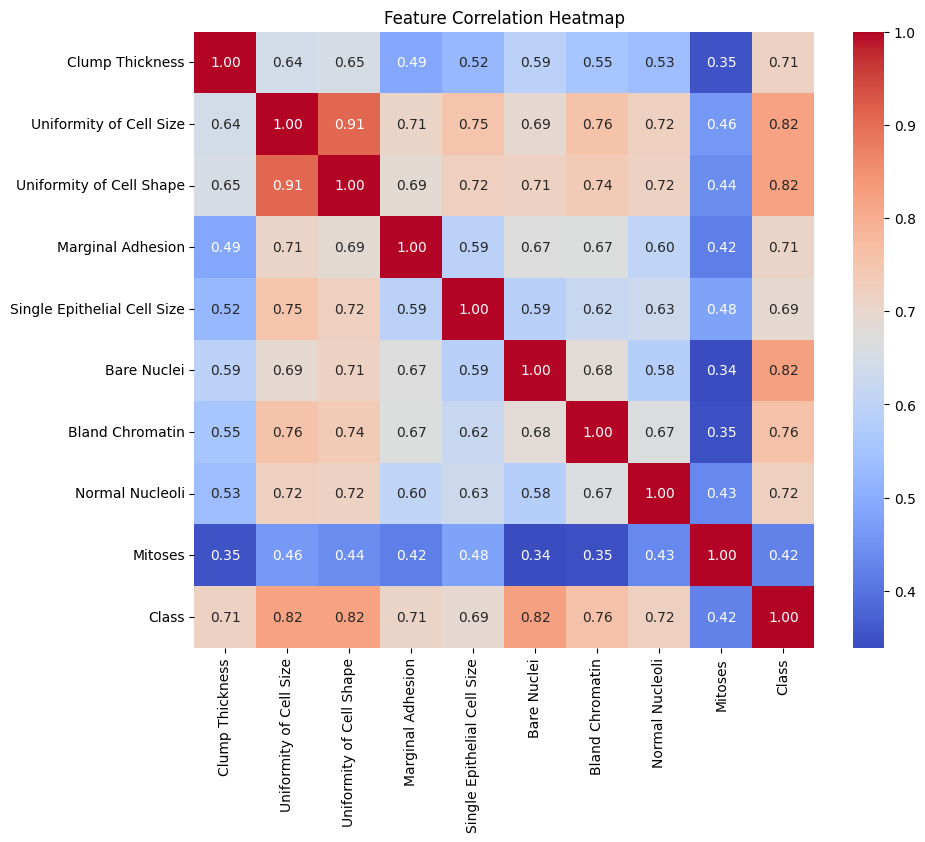

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df_eda.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

### 3. Feature Distributions (Histograms)

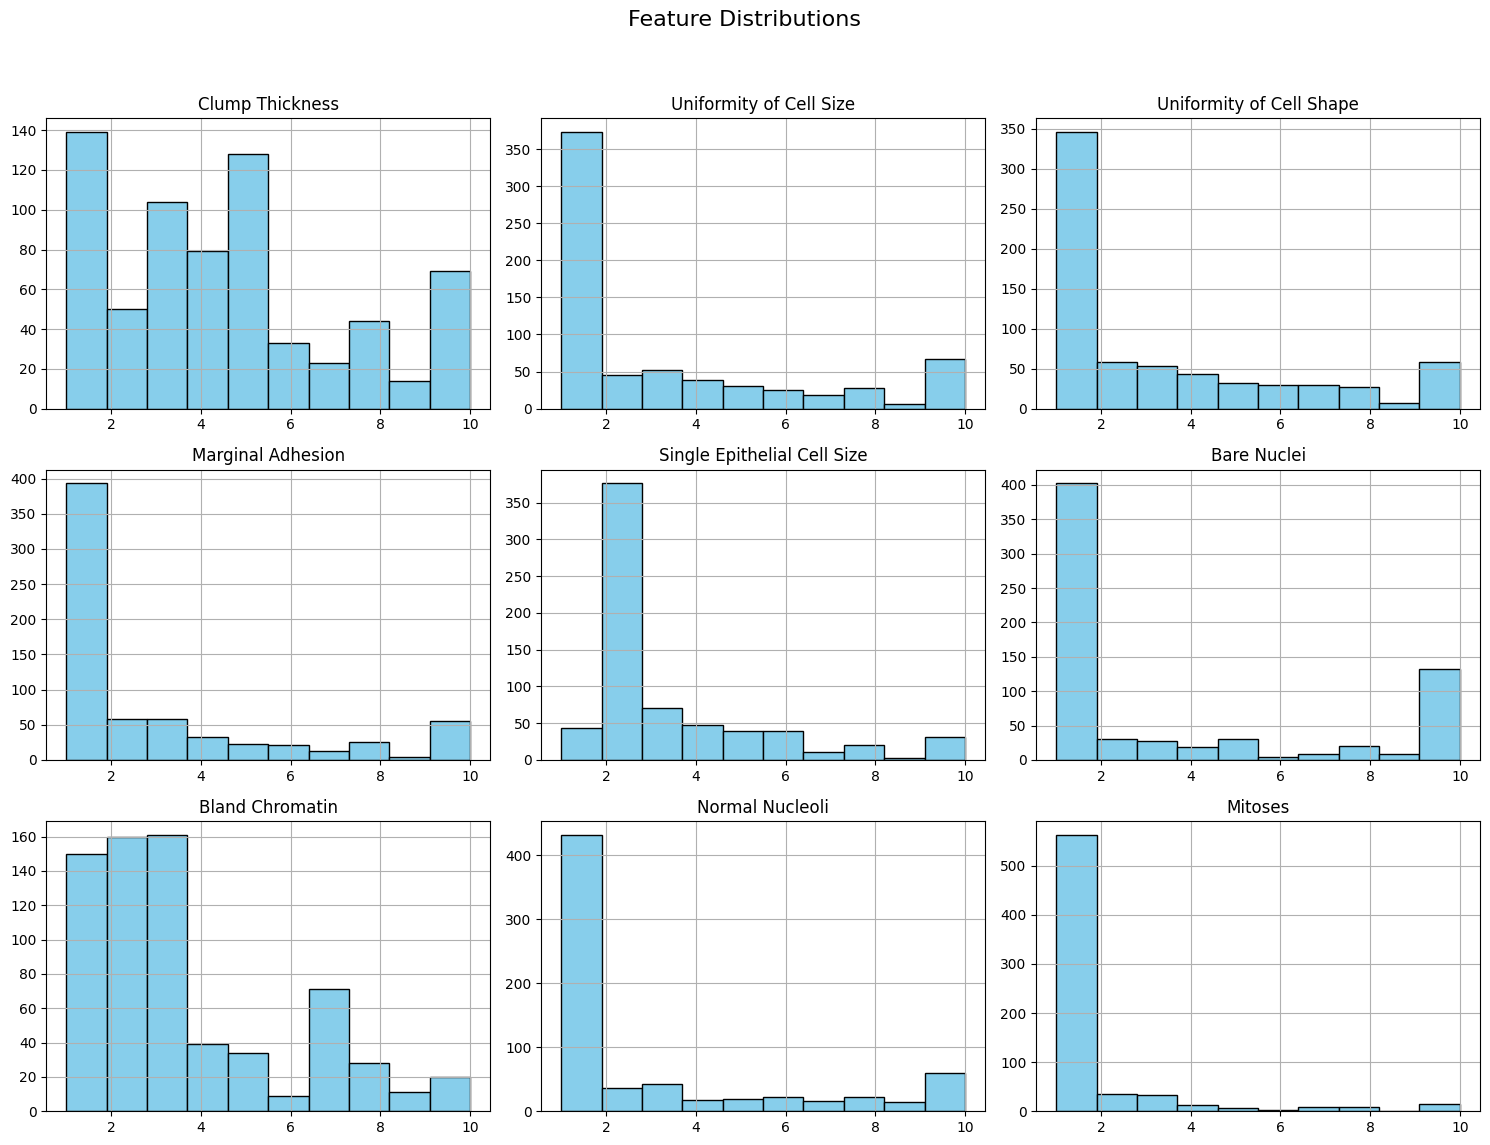

In [8]:
df_eda.drop(columns=['Class']).hist(figsize=(15,12), bins=10, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

### 4. Feature Boxplots by Class

/tmp/ipykernel_5961/1702477898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=col, data=df_eda, palette='Set2')
/tmp/ipykernel_5961/1702477898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=col, data=df_eda, palette='Set2')
/tmp/ipykernel_5961/1702477898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=col, data=df_eda, palette='Set2')
/tmp/ipykernel_5961/1702477898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

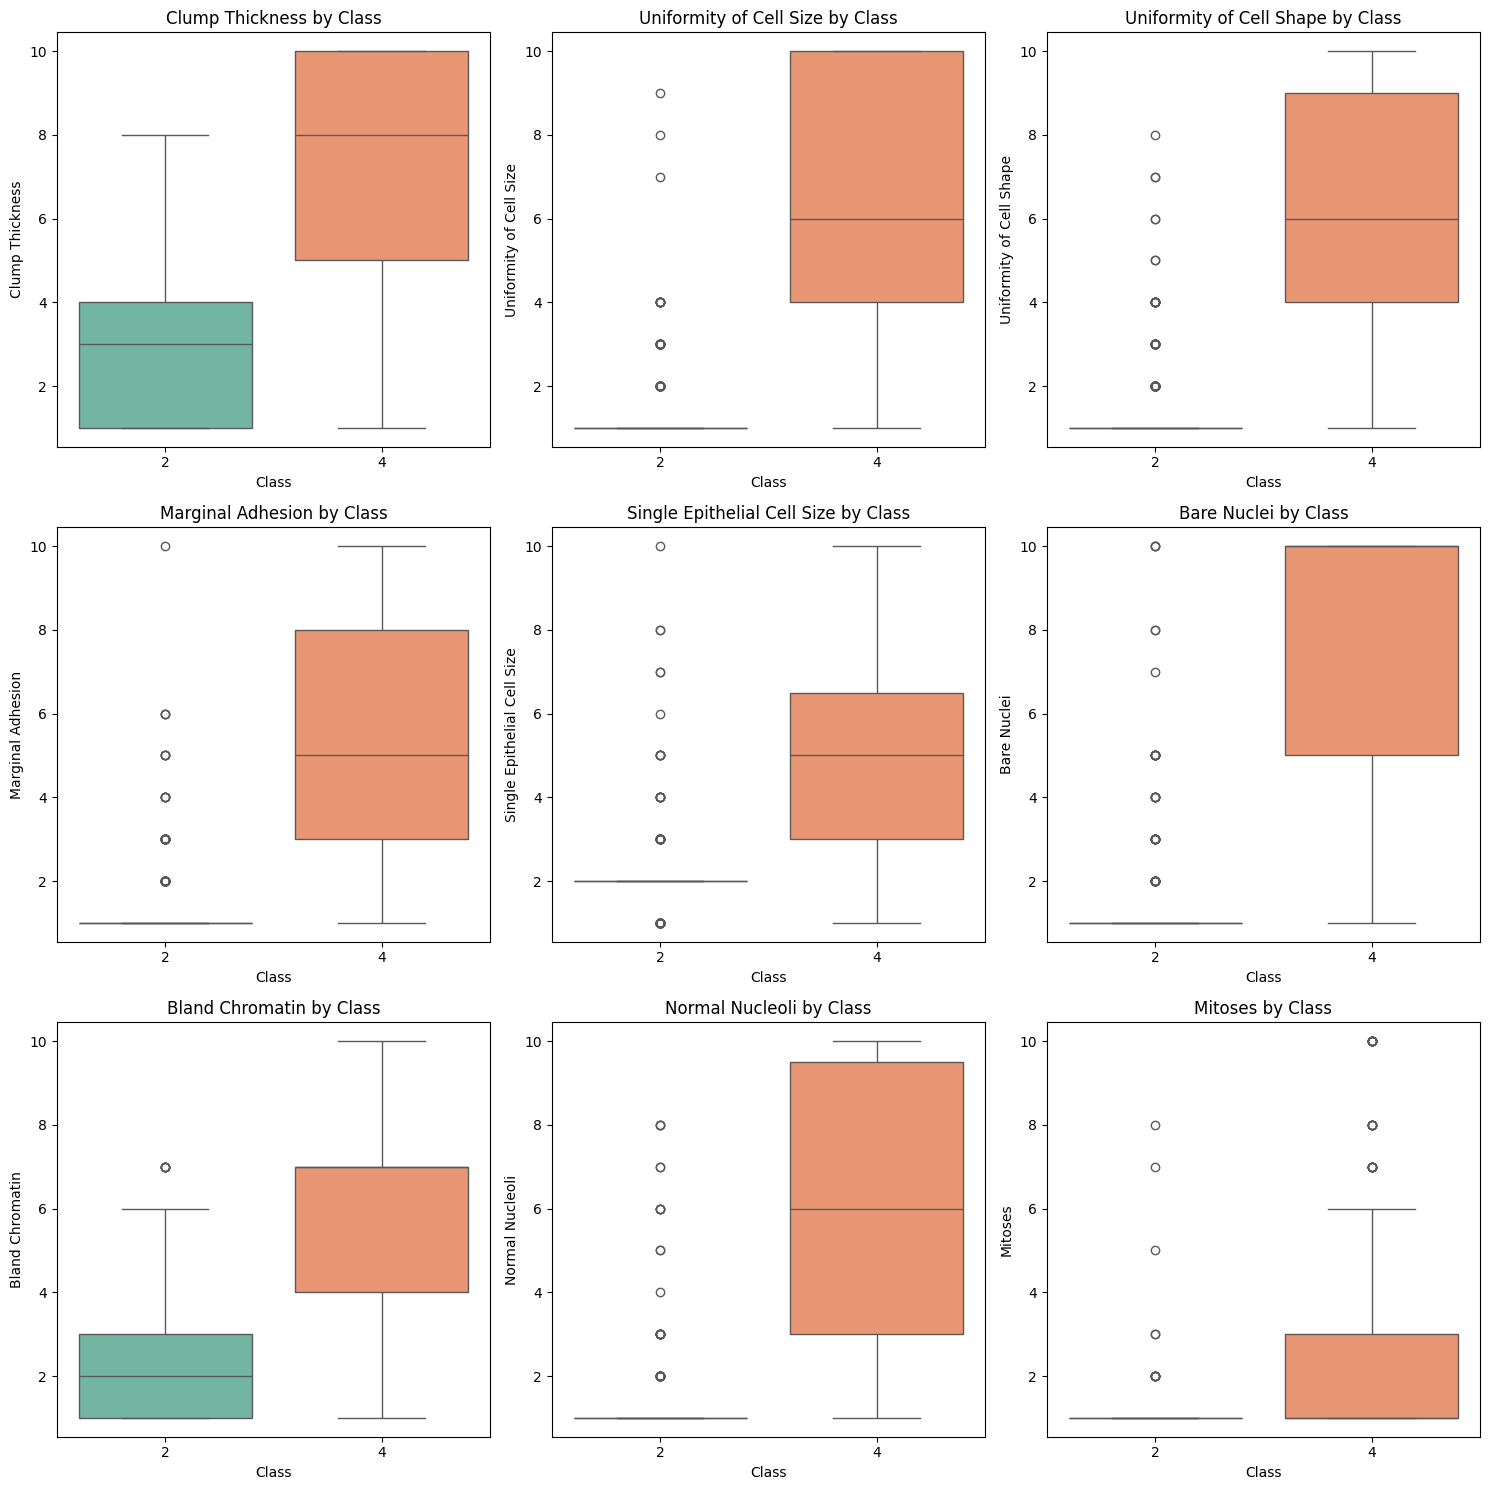

In [9]:
features = df_eda.columns[:-1]
plt.figure(figsize=(15,15))
for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x="Class", y=col, data=df_eda, palette='Set2')
    plt.title(f'{col} by Class')
plt.tight_layout()
plt.show()

### 5. PLOT Grid

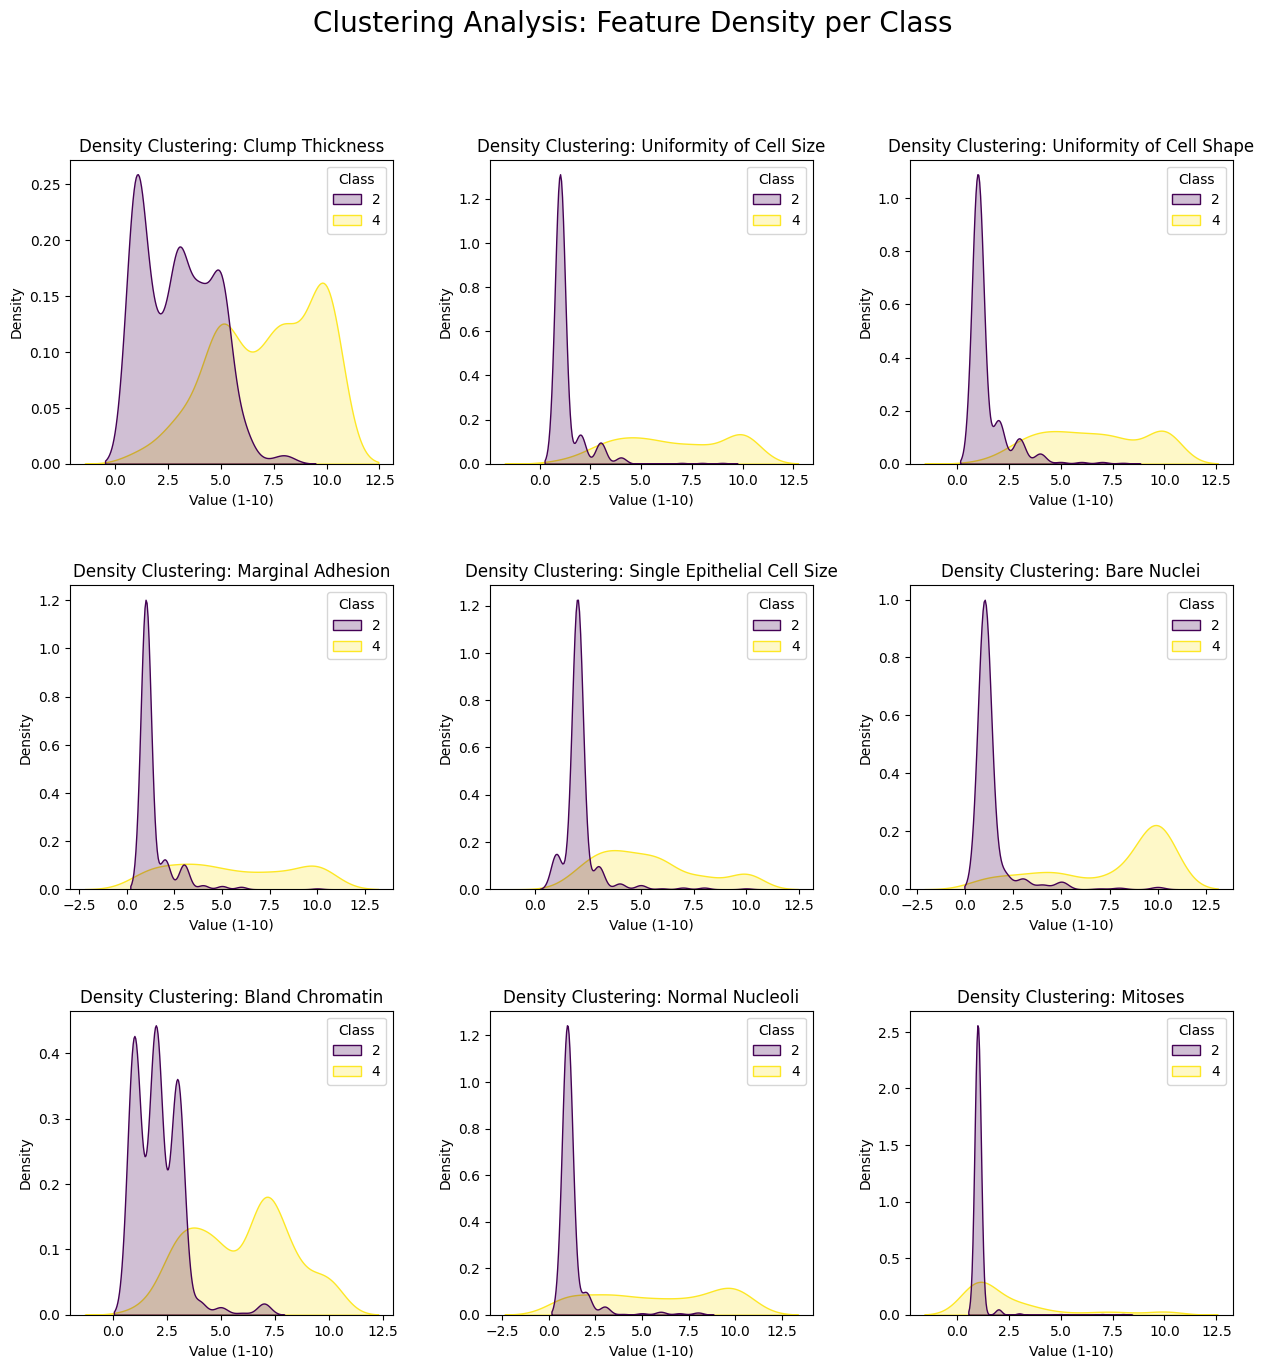

In [10]:
features = df.columns[1:-1]  # Exclude ID and Class

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    # Using KDE plot to see the "clustering" density for each class
    sns.kdeplot(data=df, x=col, hue='Class', fill=True, palette='viridis', common_norm=False)
    plt.title(f'Density Clustering: {col}')
    plt.xlabel('Value (1-10)')
    plt.ylabel('Density')

plt.suptitle('Clustering Analysis: Feature Density per Class', fontsize=20)
plt.show()

### 6. Strip Plot

/tmp/ipykernel_5961/2848942569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Class', y=col, data=df, palette='magma', alpha=0.3, jitter=True)
/tmp/ipykernel_5961/2848942569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Class', y=col, data=df, palette='magma', alpha=0.3, jitter=True)
/tmp/ipykernel_5961/2848942569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Class', y=col, data=df, palette='magma', alpha=0.3, jitter=True)
/tmp/ipykernel_5961/2848942569.py:4: FutureWarning: 

Passing `palette` without assignin

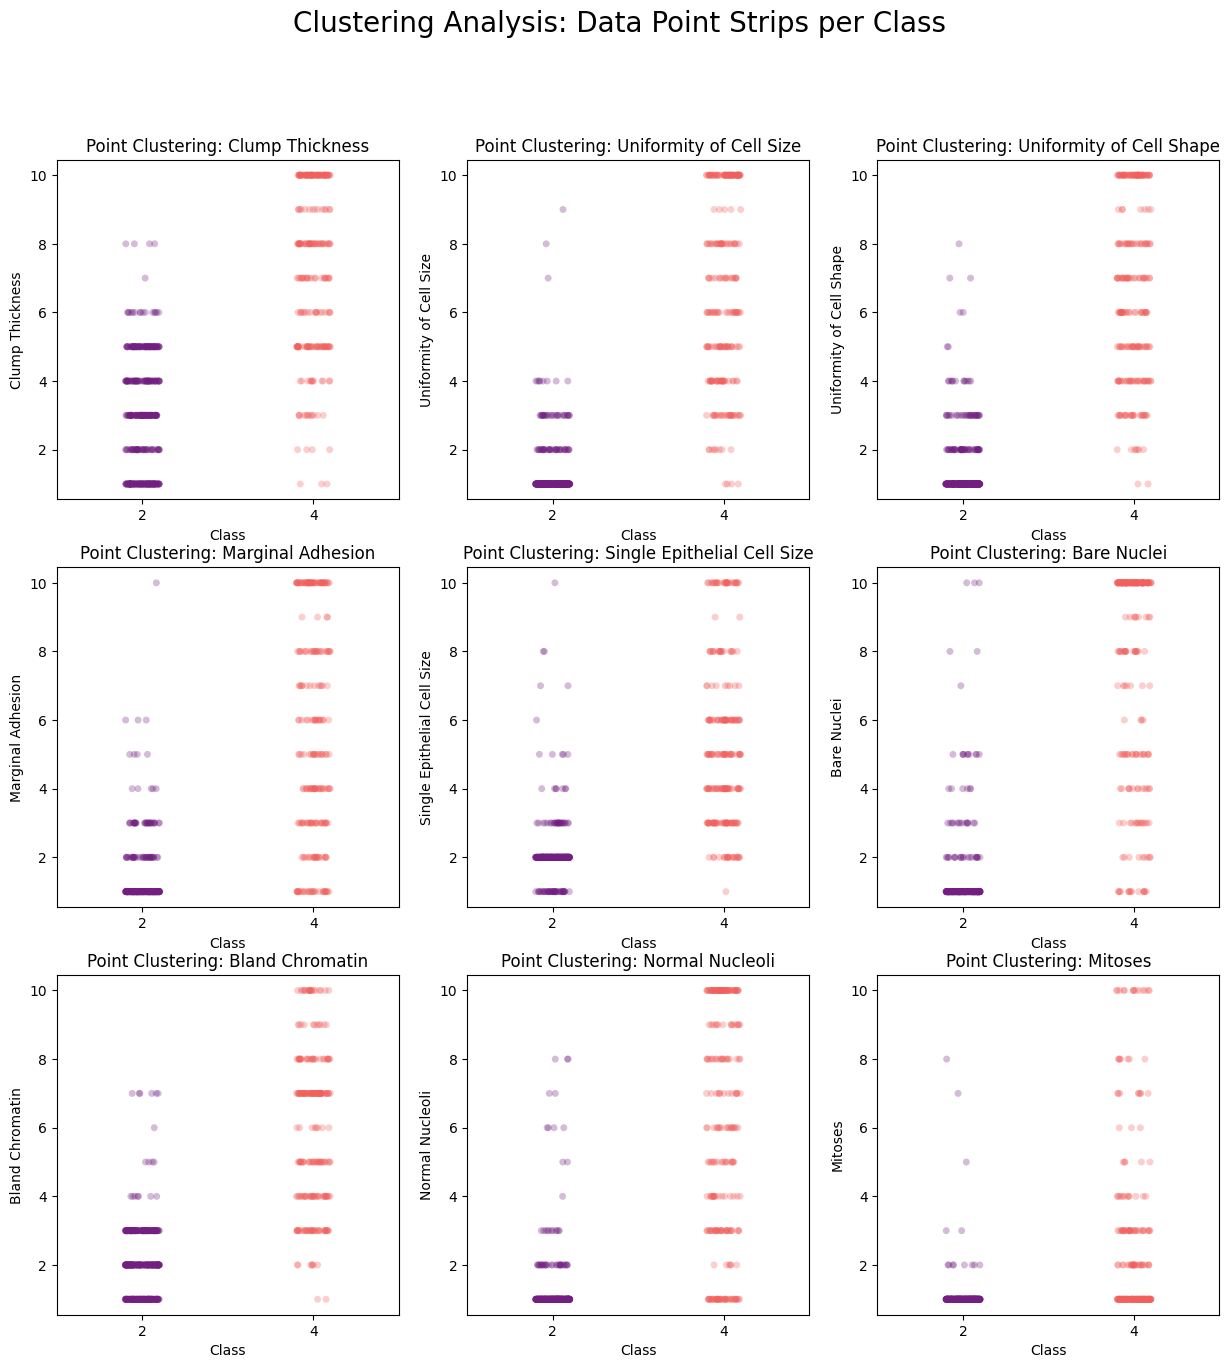

In [11]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.stripplot(x='Class', y=col, data=df, palette='magma', alpha=0.3, jitter=True)
    plt.title(f'Point Clustering: {col}')

plt.suptitle('Clustering Analysis: Data Point Strips per Class', fontsize=20)
plt.show()

### 7. Selecting top 5 features that have high correlation with Class for a readable Pair Plot

<Figure size 1500x1200 with 0 Axes>

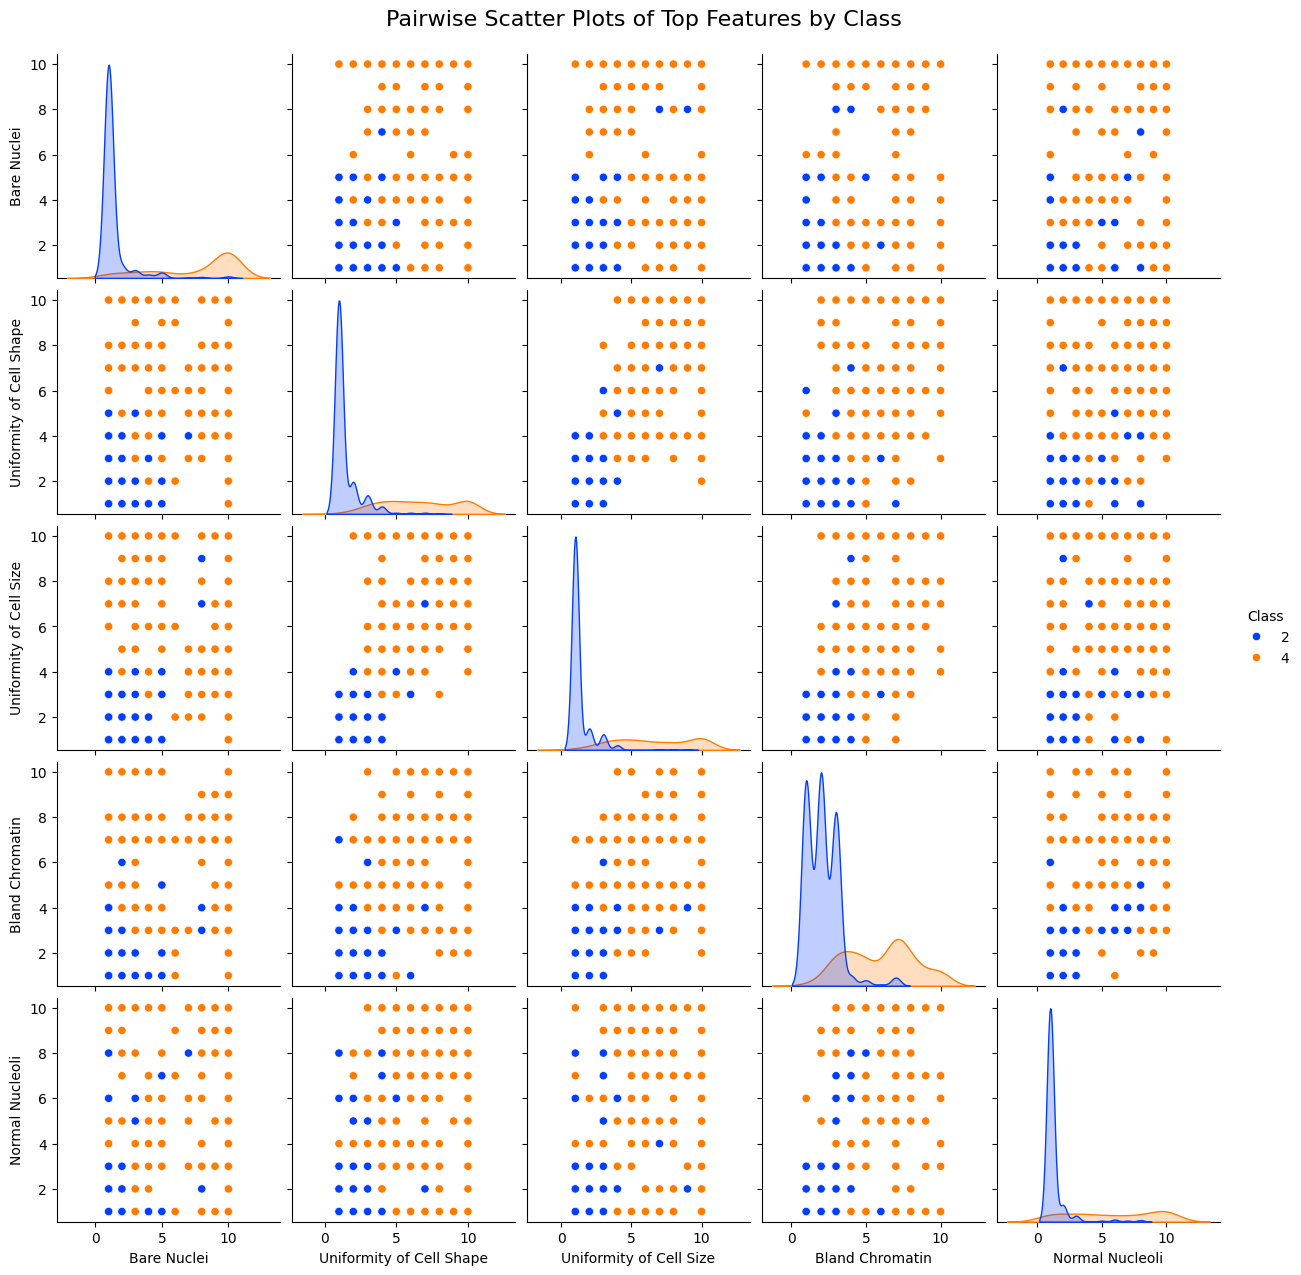

In [12]:
top_features = ['Bare Nuclei', 'Uniformity of Cell Shape', 'Uniformity of Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Class']
df_subset = df[top_features]

# Create PairPlot
plt.figure(figsize=(15, 12))
pair_plot = sns.pairplot(df_subset, hue='Class', palette='bright', diag_kind='kde')
pair_plot.fig.suptitle('Pairwise Scatter Plots of Top Features by Class', y=1.02, fontsize=16)
plt.show()


## Data Preprocessing

### 1. Feature selection

In [14]:
df = df.drop(columns=["Sample code number"])

In [16]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


### 2. Target Encoding

In [17]:
df.loc[df['Class'] == 2, 'Class'] = 0

In [18]:
df.loc[df['Class'] == 4, 'Class'] = 1

In [19]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


### 3. Train-Test Split

In [22]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [23]:
print(X)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
678                3                        1                         1   
679                2                        1                         1   
680                5                       10                        10   
681                4                        8                         6   
682                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1         

In [24]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4. Feature Scaling

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled

array([[-1.19619995, -0.69971312, -0.74055798, ..., -0.17704107,
        -0.60535415, -0.35279701],
       [ 0.2174909 , -0.69971312, -0.74055798, ..., -0.59732119,
        -0.60535415, -0.35279701],
       [-1.19619995, -0.69971312, -0.74055798, ..., -1.0176013 ,
        -0.60535415, -0.35279701],
       ...,
       [-0.48935452, -0.69971312, -0.74055798, ..., -0.59732119,
        -0.27047738, -0.35279701],
       [ 0.2174909 , -0.69971312, -0.74055798, ..., -1.0176013 ,
        -0.60535415, -0.35279701],
       [ 0.92433632,  0.61541034,  0.92753054, ...,  0.66351915,
         0.06439938, -0.35279701]], shape=(546, 9))

In [43]:
X_test_scaled

array([[-1.19619995, -0.69971312, -0.74055798, ..., -1.0176013 ,
        -0.60535415, -0.35279701],
       [-0.48935452, -0.69971312, -0.74055798, ..., -0.17704107,
        -0.60535415, -0.35279701],
       [-0.13593181, -0.04215139, -0.40694027, ..., -0.59732119,
        -0.60535415, -0.35279701],
       ...,
       [-0.48935452, -0.04215139, -0.40694027, ..., -0.17704107,
        -0.60535415, -0.35279701],
       [-0.48935452, -0.69971312, -0.74055798, ..., -0.59732119,
        -0.60535415, -0.35279701],
       [ 0.2174909 , -0.04215139,  0.59391283, ...,  0.24323904,
         2.40853671, -0.35279701]], shape=(137, 9))

In [45]:
X_train_scaled

array([[-1.19619995, -0.69971312, -0.74055798, ..., -0.17704107,
        -0.60535415, -0.35279701],
       [ 0.2174909 , -0.69971312, -0.74055798, ..., -0.59732119,
        -0.60535415, -0.35279701],
       [-1.19619995, -0.69971312, -0.74055798, ..., -1.0176013 ,
        -0.60535415, -0.35279701],
       ...,
       [-0.48935452, -0.69971312, -0.74055798, ..., -0.59732119,
        -0.27047738, -0.35279701],
       [ 0.2174909 , -0.69971312, -0.74055798, ..., -1.0176013 ,
        -0.60535415, -0.35279701],
       [ 0.92433632,  0.61541034,  0.92753054, ...,  0.66351915,
         0.06439938, -0.35279701]], shape=(546, 9))

## Training the Model

In [46]:
model_gnb = GaussianNB()

In [47]:
model_gnb.fit(X_train_scaled, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [48]:
y_test

175    0
162    0
356    0
488    0
409    0
      ..
181    1
448    0
112    0
557    0
58     1
Name: Class, Length: 137, dtype: int64

In [50]:
y_pred = model_gnb.predict(X_test_scaled)

## Creating model pipeline

In [64]:
from sklearn.pipeline import Pipeline, make_pipeline

In [65]:
pipeline = make_pipeline(StandardScaler(), GaussianNB())

In [68]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('gaussiannb', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [70]:
y_p_pred = pipeline.predict(X_test)

## Metrics

In [71]:
accuracy_score(y_test, y_p_pred)

0.9635036496350365

In [73]:
report = classification_report(y_test, y_p_pred, output_dict=True)

In [74]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.988372,0.921569,0.963504,0.954970,0.964966
recall,0.955056,0.979167,0.963504,0.967111,0.963504
f1-score,0.971429,0.949495,0.963504,0.960462,0.963744
support,89.000000,48.000000,0.963504,137.000000,137.000000


In [77]:
confusion_matrix(y_test, y_pred)

array([[85,  4],
       [ 1, 47]])

## Exporting the Model

In [78]:
import joblib

In [81]:
joblib.dump(pipeline, "./models/brest-cancer-classification.pkl")

['./models/brest-cancer-classification.pkl']

## Testing the model with synthetic data

In [82]:
model = joblib.load("./models/brest-cancer-classification.pkl")

In [87]:
test_data = pd.read_csv("./data/test.csv")

In [88]:
test_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,3,1,3,3,1,1,3,2,3,NaN,NaN,NaN
1,3,3,3,1,3,2,1,2,2,NaN,NaN,NaN
2,2,2,1,1,2,2,1,1,1,NaN,NaN,NaN
3,3,3,3,2,3,2,2,3,2,NaN,NaN,NaN
4,3,3,1,3,1,3,3,1,1,NaN,NaN,NaN
5,9,8,10,7,10,8,8,8,7,NaN,NaN,NaN
6,8,7,8,10,10,9,10,9,10,NaN,NaN,NaN
7,7,10,9,9,8,7,10,8,10,NaN,NaN,NaN
8,10,8,8,8,8,8,10,8,7,NaN,NaN,NaN
9,9,8,8,10,8,8,8,10,8,NaN,NaN,NaN


In [89]:
test_data = test_data.iloc[:, :-3]

In [90]:
test_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,3,1,3,3,1,1,3,2,3
1,3,3,3,1,3,2,1,2,2
2,2,2,1,1,2,2,1,1,1
3,3,3,3,2,3,2,2,3,2
4,3,3,1,3,1,3,3,1,1
5,9,8,10,7,10,8,8,8,7
6,8,7,8,10,10,9,10,9,10
7,7,10,9,9,8,7,10,8,10
8,10,8,8,8,8,8,10,8,7
9,9,8,8,10,8,8,8,10,8


In [91]:
y_pred = model.predict(test_data)

In [92]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])